In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('coca_cola_sales_data.csv')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,BevCo,1185732,1/1/2022,Northeast,New York,New York,Coca-Cola,$0.50,"12,000","$6,000","$3,000",50%
1,BevCo,1185732,1/2/2022,Northeast,New York,New York,Diet Coke,$0.50,"10,000","$5,000","$1,500",30%
2,BevCo,1185732,1/3/2022,Northeast,New York,New York,Sprite,$0.40,"10,000","$4,000","$1,400",35%
3,BevCo,1185732,1/4/2022,Northeast,New York,New York,Fanta,$0.45,"8,500","$3,825","$1,339",35%
4,BevCo,1185732,1/5/2022,Northeast,New York,New York,Powerade,$0.60,"9,000","$5,400","$1,620",30%
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,BevCo,1185732,1/24/2023,Northeast,New Hampshire,Manchester,Powerade,$0.50,640,$320,$90,28%
9644,BevCo,1185732,1/24/2023,Northeast,New Hampshire,Manchester,Dasani Water,$0.41,"1,050",$431,$138,32%
9645,BevCo,1185732,2/22/2023,Northeast,New Hampshire,Manchester,Coca-Cola,$0.41,"1,840",$754,$279,37%
9646,BevCo,1185732,2/22/2023,Northeast,New Hampshire,Manchester,Diet Coke,$0.42,700,$294,$123,42%


In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,BevCo,1185732,1/1/2022,Northeast,New York,New York,Coca-Cola,$0.50,"12,000","$6,000","$3,000",50%
1,BevCo,1185732,1/2/2022,Northeast,New York,New York,Diet Coke,$0.50,"10,000","$5,000","$1,500",30%
2,BevCo,1185732,1/3/2022,Northeast,New York,New York,Sprite,$0.40,"10,000","$4,000","$1,400",35%
3,BevCo,1185732,1/4/2022,Northeast,New York,New York,Fanta,$0.45,"8,500","$3,825","$1,339",35%
4,BevCo,1185732,1/5/2022,Northeast,New York,New York,Powerade,$0.60,"9,000","$5,400","$1,620",30%


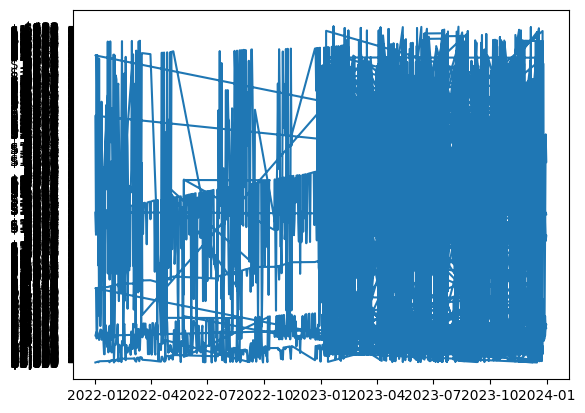

In [ ]:
#sales over time
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors = 'coerce')
fig, ax = plt.subplots()
ax.plot(df['Invoice Date'], df['Total Sales'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Beverage Brand    9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   object        
 12  Year-Month        9648 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(4), object(6), period[M](1)
memory usa

In [ ]:
# Monthwise data
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')

In [ ]:
# Monthwise data
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')
df['Total Sales'] = df['Total Sales'].astype(str).str.replace('$', '').str.replace(',', '')
df['Total Sales'] = pd.to_numeric(df['Total Sales'])
monthly_sales = df.groupby('Year-Month')['Total Sales'].sum()
monthly_sales

,Total Sales
Year-Month,
2022-01,231285
2022-02,214086
2022-03,247428
2022-04,319324
2022-05,216487
2022-06,108424
2022-07,218247
2022-08,264171
2022-09,236776


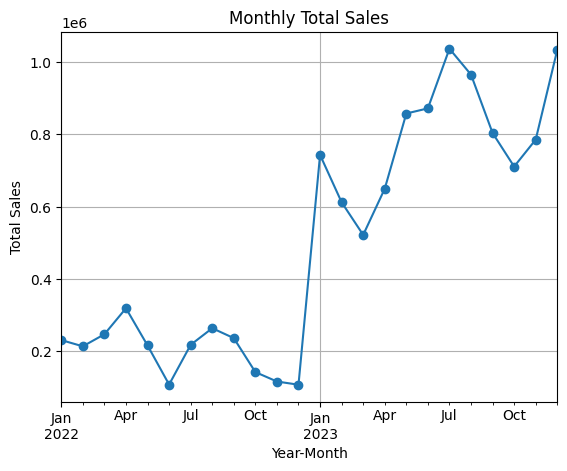

In [ ]:
fig, ax = plt.subplots()
monthly_sales.plot(marker = 'o')
plt.title('Monthly Total Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Which regions contribute the highest and lowest total sales?

In [ ]:
region_sales = df.groupby('Region')['Total Sales'].sum()
region_sales

,Total Sales
Region,
Midwest,1667581
Northeast,2508046
South,2060451
Southeast,2137538
West,3643785


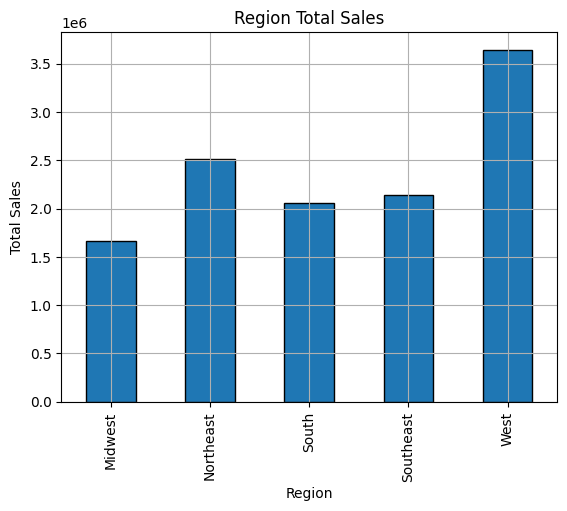

In [ ]:
fig, ax = plt.subplots()
region_sales.plot(kind = 'bar', edgecolor = 'black')
plt.title('Region Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

<Axes: xlabel='Region'>

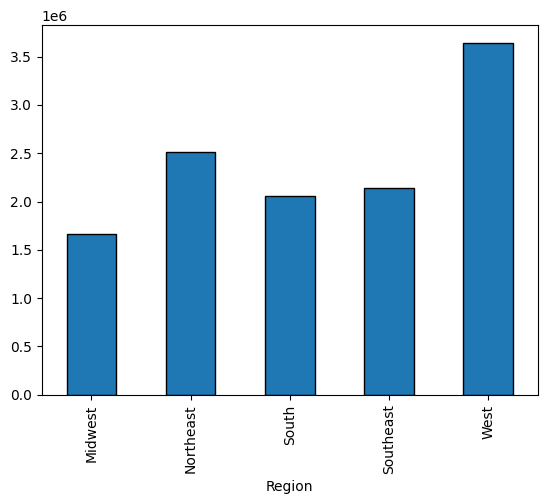

In [ ]:
region_sales = df.groupby('Region')['Total Sales'].sum()
region_sales.plot(kind = 'bar', edgecolor = 'black')

Which beverage brands generate the highist operating profit?

<Axes: xlabel='Beverage Brand'>

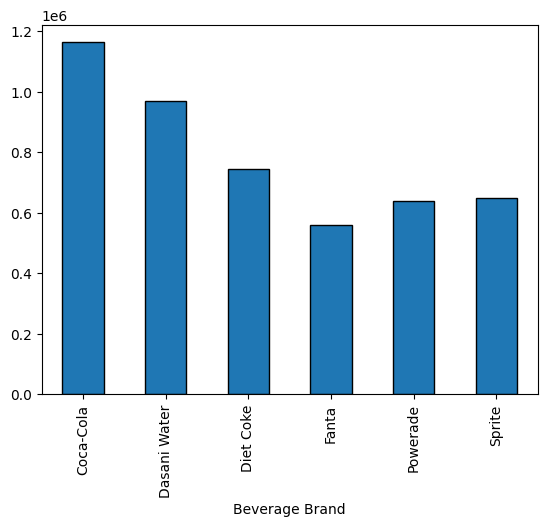

In [ ]:
df['Operating Profit'] = df['Operating Profit'].astype(str).str.replace('$', '').str.replace(',', '')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'])
region_sales = df.groupby('Beverage Brand')['Operating Profit'].sum()
region_sales.plot(kind = 'bar', edgecolor = 'black')

How does price per unit impact the number of unit sold?
what is the relationship b/w price per unit and number of unit

In [ ]:
df['Price per Unit'] = df['Price per Unit'].astype(str).str.replace('$', '').astype(float)
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(',', '').astype(int)
display(df[['Price per Unit', 'Units Sold']].head())

,Price per Unit,Units Sold
0,0.50,12000
1,0.50,10000
2,0.40,10000
3,0.45,8500
4,0.60,9000


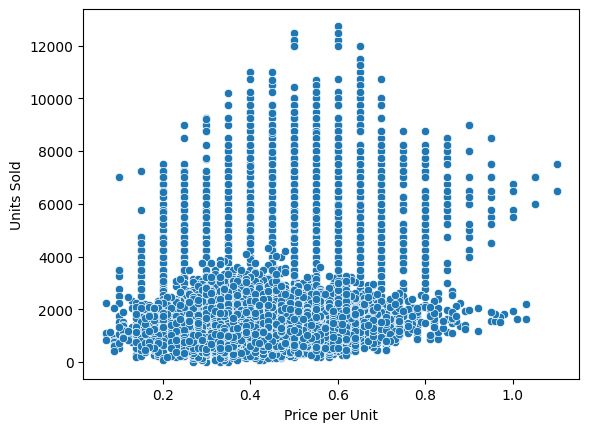

In [ ]:
sns.scatterplot(x=df['Price per Unit'], y=df['Units Sold'])
plt.show()


## Key Insights and Results

1. Sales performance is not uniform across regions.  
   Certain regions consistently contribute a higher share of total revenue, indicating stronger market presence or demand in those areas.

2. A small subset of products contributes disproportionately to overall sales.  
   This suggests a classic Pareto pattern where top-performing products drive most of the revenue.

3. Sales show noticeable variation over time.  
   Peaks and dips in sales indicate the influence of seasonality, promotions, or market demand cycles.

4. Average sales values differ significantly across product categories.  
   Some categories generate higher revenue per transaction, highlighting opportunities for focused marketing or pricing strategies.

5. Data cleaning and preprocessing were essential before analysis.  
   Handling missing values and ensuring consistent data types improved the reliability of sales trends and comparisons.
